In [1]:
import numpy as np
from matplotlib import animation, pyplot as plt

In [5]:
%matplotlib

def plot_a_pde(U,ylim):
    # Make the x and y data.
    y = U[:,0]
    # Initialize a matplotlib figure.
    f = plt.figure()
    # Set the x and y axes by constructing an axes object.
    plt.axes(xlim=(0,1), ylim=ylim)
    # Plot an empty line to use in the animation.
    # Notice that we are unpacking a tuple of length 1.
    line, = plt.plot([], [])
    # Define an animation function that will update the line to
    # reflect the desired data for the i'th frame.
    def animate(i):
        # Set the data for updated version of the line.
        line.set_data(x,U[:,i])
        # Notice that this returns a tuple of length 1.
        return line,
    # Create the animation object.
    # 'frames' is the number of frames before the animation should repeat.
    # 'interval' is the amount of time to wait before updating the plot.
    # Be sure to assign the animation a name so that Python does not
    # immediately garbage collect (delete) the object.
    a = animation.FuncAnimation(f, animate, frames=t.shape[0], interval=50)
    # Show the animation.
    plt.show()
    return a

Using matplotlib backend: Qt5Agg


# Problem 1

In [16]:
# utt = uxx
# u(0,t) = u(1,t) = 0
# u(x,0) = sin(2*pi*x)
# ut(x,0) = 0
# numerically approximate for t in [0,.5].
# Subintervals: J=50 in x dim, M=50 in t dim

s = 1
f = lambda x: np.sin(2*np.pi*x)
fpp = lambda x: -4*np.pi**2*np.sin(2*np.pi*x)
g = lambda x: np.zeros_like(x)
x = np.linspace(0,1, 51)
t = np.linspace(0,.5,51)
dx = x[1] - x[0]
dt = t[1] - t[0]
lmbda = s*dt/dx
U = np.zeros((len(x), len(t)))
U[:,0] = f(x)
U[:,1] = U[:,0] + g(x)*dt + s**2 * fpp(x) * dt**2 / 2
#U[:,2] = 2*(1-lmbda**2)*U[:,1] + lmda**2*(np.pad(U[1:,1], (0,1), 'constant') + np.pad(U[:-1,1], (1,0), 'constant'))
for m in range(3,len(t)):
    U[:,m] = 2*(1-lmbda**2)*U[:,m-1] + lmbda**2*(np.pad(U[1:,m-1], (0,1), 'constant') + np.pad(U[:-1,m-1], (1,0), 'constant')) - U[:,m-2]
    
plot_a_pde(U, (-16,16))

xx,tt = np.meshgrid(x,t)
U = np.sin(2*np.pi*xx)*np.cos(2*np.pi*tt)
plot_a_pde(U, (-16,16))


# Problem 2

In [13]:
# utt = uxx
# u(0,t) = u(1,t) = 0
# u(x,0) = sin(2*pi*x)
# ut(x,0) = 0
# numerically approximate for t in [0,.5].
# Subintervals: J=50 in x dim, M=50 in t dim

m = 20
s = 1
f = lambda x: .2*np.exp(-m**2 * (x - .5)**2)
fpp = lambda x: -.4*m**2 * (x-.5)*np.exp(-m**2*(x - .5)**2)
g = lambda x: .4*m**2 * (x-.5)*np.exp(-m**2*(x - .5)**2)

%matplotlib
for X,T in [(201,221),(201,181)]:
    x = np.linspace(0,1, X)
    t = np.linspace(0,1,T)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    lmbda = s*dt/dx
    U = np.zeros((len(x), len(t)))
    U[:,0] = f(x)
    U[:,1] = U[:,0] + g(x)*dt + s**2 * fpp(x) * dt**2 / 2
    #U[:,2] = 2*(1-lmbda**2)*U[:,1] + lmda**2*(np.pad(U[1:,1], (0,1), 'constant') + np.pad(U[:-1,1], (1,0), 'constant'))
    for m in range(3,len(t)):
        U[:,m] = 2*(1-lmbda**2)*U[:,m-1] + lmbda**2*(np.pad(U[1:,m-1], (0,1), 'constant') + np.pad(U[:-1,m-1], (1,0), 'constant')) - U[:,m-2]
    #print(U.max(), U.min())
    plot_a_pde(U, (-1,1))

Using matplotlib backend: Qt5Agg


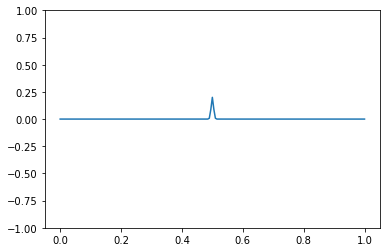

In [10]:
%matplotlib inline
plt.plot(x,f(x))
plt.ylim((-1,1))
plt.show()